In [48]:
import numpy as np

from sklearn.datasets import make_regression

import matplotlib.pyplot as plt


 on peut maintenant devlopper des modele non linéaire avec plusieur variable.
 * non linéaire car notre monde est rempli de phenomene non linaire. mais on peut tout de meme les estimé grace 
 a la regression linéaire. grace  aux matrice, nous pouvons faiire cela

 notre modele sera donc f(x) = ax^2+bx+c où f(x) sera donc y estimé

 l'écriture matricielle sera X la matrices des features et theta la matrices des parametre. f(x) =      X*theta

 X sera une matrice de taille (m x 3) avec premier colonne les x^2 puis la seconde colonne les x ,et la derniere une ligne de 1 ( car c n'a pas de variable)

theta sera une vecteur colonne [a,b,c]


ici on va pas changer gros chose a part sur hstack, sur le theta pour changer ses dimmenssion, sur le y = y + abs y/2, et c'est tout.

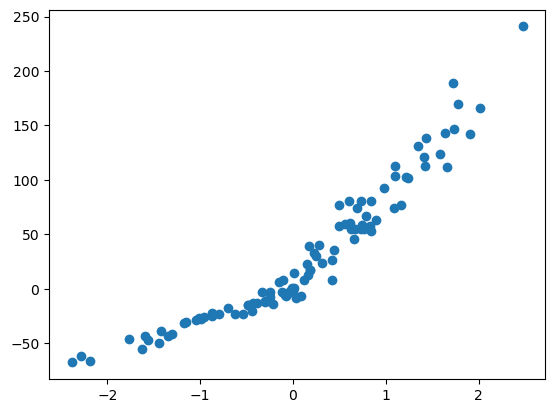

In [64]:

# simulation d'un jeu de donnée

x , y = make_regression (n_samples= 100 , n_features=  1 , noise = 10) 

y = y + abs(y/2) # on fait une transformation des vrai valeur y pour avoir une sorte de non linéarité sur les données

plt.scatter(x,y)

In [50]:

print(x.shape)

print (x)

y = y.reshape(y.shape[0],1)

print(y)

print(y.shape)




(100, 1)
[[ 1.53776816]
 [ 0.71235773]
 [ 0.58175919]
 [-0.16623026]
 [ 1.05354397]
 [ 0.40769215]
 [ 1.88246296]
 [-0.30753011]
 [-0.09582147]
 [ 0.77932637]
 [ 0.29470115]
 [-1.13818416]
 [ 0.94507491]
 [-1.96354454]
 [-1.22541759]
 [ 0.4975    ]
 [ 0.13027336]
 [ 2.03190946]
 [ 0.90237767]
 [ 1.70177551]
 [ 1.25740671]
 [-1.3911913 ]
 [-1.71067786]
 [-0.50452707]
 [ 1.39054348]
 [-1.82578456]
 [-1.74265628]
 [-0.95520519]
 [ 0.28659172]
 [-0.11000983]
 [ 1.44448402]
 [-0.60097564]
 [-0.05409185]
 [ 1.47516369]
 [ 2.20346008]
 [ 2.45382328]
 [ 1.54915549]
 [-0.15653446]
 [-0.27266519]
 [ 0.56196206]
 [-1.6594868 ]
 [-0.27680035]
 [ 0.32064592]
 [ 0.45077069]
 [-0.87998576]
 [-1.41143982]
 [-2.06634552]
 [-2.3249318 ]
 [ 0.48015675]
 [ 0.48273462]
 [ 0.17413017]
 [ 0.95293217]
 [-0.28820885]
 [ 0.30242593]
 [-0.16559786]
 [-0.42638609]
 [ 0.34824499]
 [-1.378829  ]
 [-0.11395419]
 [ 0.70889135]
 [-0.64283459]
 [-0.31956214]
 [-0.32196026]
 [-0.45810972]
 [ 0.40889817]
 [ 0.1988829 ]
 

In [51]:

X = np.hstack ((x**2 , x ,np.ones(x.shape))) # la on va rajouter donc une colone x**2 a la matrice X

print (X , X.shape)



[[ 2.36473092e+00  1.53776816e+00  1.00000000e+00]
 [ 5.07453536e-01  7.12357731e-01  1.00000000e+00]
 [ 3.38443752e-01  5.81759187e-01  1.00000000e+00]
 [ 2.76325002e-02 -1.66230263e-01  1.00000000e+00]
 [ 1.10995490e+00  1.05354397e+00  1.00000000e+00]
 [ 1.66212892e-01  4.07692154e-01  1.00000000e+00]
 [ 3.54366681e+00  1.88246296e+00  1.00000000e+00]
 [ 9.45747705e-02 -3.07530113e-01  1.00000000e+00]
 [ 9.18175426e-03 -9.58214707e-02  1.00000000e+00]
 [ 6.07349596e-01  7.79326373e-01  1.00000000e+00]
 [ 8.68487669e-02  2.94701148e-01  1.00000000e+00]
 [ 1.29546317e+00 -1.13818416e+00  1.00000000e+00]
 [ 8.93166579e-01  9.45074906e-01  1.00000000e+00]
 [ 3.85550718e+00 -1.96354454e+00  1.00000000e+00]
 [ 1.50164828e+00 -1.22541759e+00  1.00000000e+00]
 [ 2.47506255e-01  4.97500005e-01  1.00000000e+00]
 [ 1.69711472e-02  1.30273356e-01  1.00000000e+00]
 [ 4.12865607e+00  2.03190946e+00  1.00000000e+00]
 [ 8.14285455e-01  9.02377668e-01  1.00000000e+00]
 [ 2.89603990e+00  1.70177551e+

on standardise pour mettre tout sur une echelle commune ( meme poids) et ainsi eviter les biais.
Imaginons que tu souhaites prédire le prix des maisons en utilisant deux variables indépendantes :
Superficie en mètres carrés (par exemple, une variable avec des valeurs allant de 50 à 300).
Âge de la maison en années (par exemple, une variable avec des valeurs allant de 1 à 100).
Les deux variables ont des échelles très différentes. La superficie peut varier de 50 à 300 mètres carrés, tandis que l'âge de la maison peut varier de 1 à 100 ans. Si nous utilisons ces variables directement dans une régression linéaire, le modèle pourrait être biaisé en faveur de la variable avec l'échelle la plus grande (superficie).*

standardiser n'implique pas necessairement que les valeur sont colpris entre [-1 , 1] il se peut que ces valeurs oscille au voisinage de 1 ou -1 cad 1,02 , - 1,08...


In [52]:

theta = np.random.randn(3,1) 
print (theta)

[[-0.01949761]
 [ 0.71251323]
 [-0.12598292]]


(100, 1)

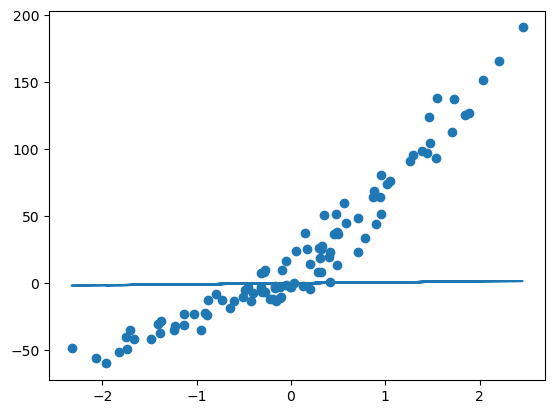

In [53]:

# modele linéaire : f(x) = X*theta où f(x) = y estimé

def model (X, theta):
    return X.dot(theta)

plt.scatter(x,y)

plt.plot(x,model(X,theta)) 


model(X,theta).shape

In [54]:


def fonction_de_cout(X,y, theta):
    m = len(x)
   
    return (1/(2*m))*np.sum(((model(X, theta)) - y)**2)


fonction_de_cout(X , y , theta)

1638.6649379596104

In [55]:

def gradient(X,y,theta):
    m = len(y)
    return 1/m*(X.T.dot(model(X,theta) - y))

gradient (X,y,theta)



array([[-46.01917038],
       [-52.11625227],
       [-21.87171888]])

In [56]:


def decent_gradient( X, y , theta , learning_rate , n_iteration):

    courbe_minimisation_erreur = np.zeros(n_iteration) 

    for i in range ( n_iteration) :

        theta = theta - learning_rate * gradient(X,y,theta)

        courbe_minimisation_erreur[i] = fonction_de_cout (X,y,theta)
    return theta , courbe_minimisation_erreur 


theta_final , courbe_minimisation_erreur = decent_gradient(X,y,theta, learning_rate=0.01, n_iteration=400)



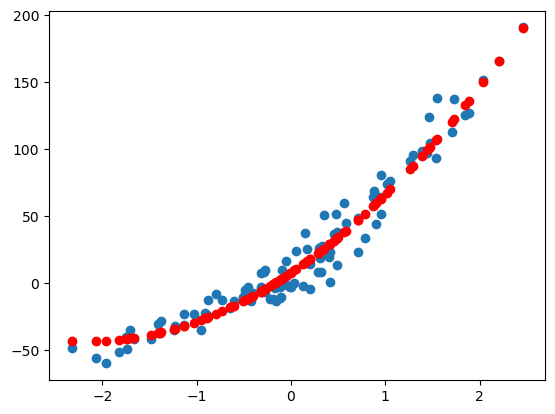

In [61]:
regression = model(X,theta_final) 

plt.scatter(x,y) 

# alors pourquoi scatter et pas plot. en gros la decente du grandient va chercher des point a chaque iteration donc plot va relier ses points
# mais sur une droite ca se voit pas mais sur une courbe on voit que les point sont relier tous entre eux ( voiir formule de la deecente du gradients)
# au moins avec scater on a n'a pas de liasion des point et il nous affiche seulement les points truver par decent gradient

plt.scatter(x, regression , c="r")

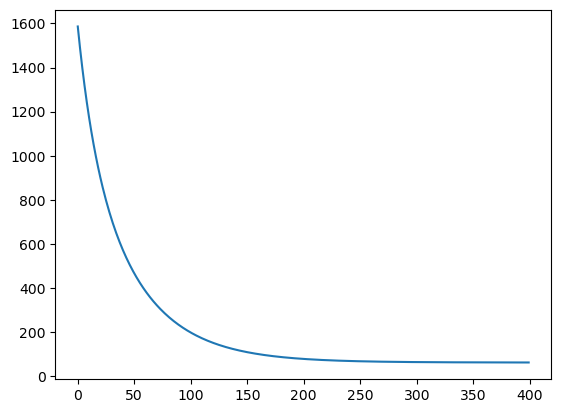

In [58]:
plt.plot(range(400),courbe_minimisation_erreur) 

In [59]:

def coef_determination(y, regression):

    coef = 1 - (np.sum((y - regression)**2))/ np.sum(((y - np.mean(y))**2))

    if coef <= 0.9:
        print(f"le coefficient est égale à {coef}")

    else:
        return f"le coefficient de determination est égale à {coef}, le modèle est tres bien ajuster "
    

coef_determination(y,regression)



'le coefficient de determination est égale à 0.9566230389342313, le modèle est tres bien ajuster '